# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [206]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [207]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [208]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        y_pred = np.dot(X, w)
        return np.mean((y_pred - y) ** 2)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        y_pred = np.dot(X, w)
        return 2 * np.dot(X.T, (y_pred - y)) / X.shape[0]

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [209]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать
траекторию спуска (список из новых значений весов на каждом шаге)

In [210]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    w = w_init.copy()
    w_list = [w.copy()]
    for i in range(n_iterations):
        w -= lr * loss.calc_grad(X, y, w)
        w_list.append(w.copy())
    return np.array(w_list)

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [211]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [212]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [213]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

lr = 0.01


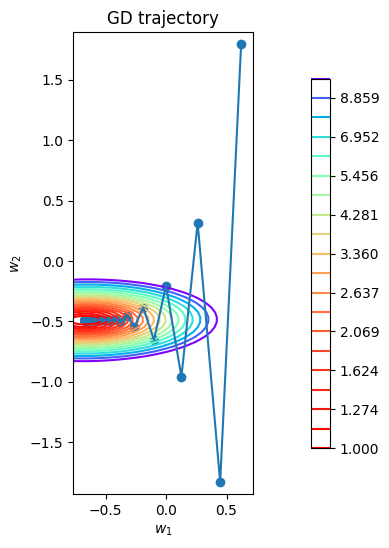

lr = 0.0031622776601683794


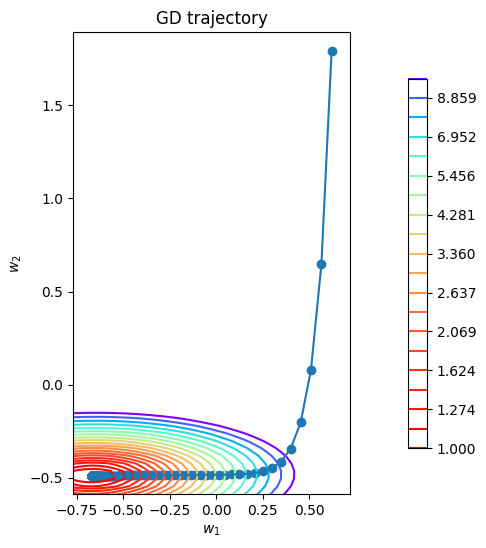

lr = 0.001


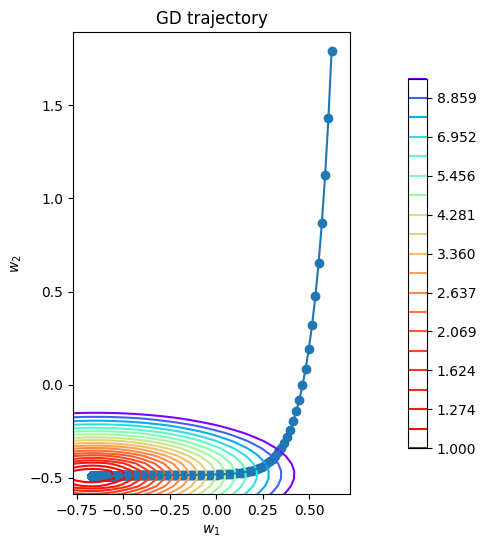

lr = 0.00031622776601683794


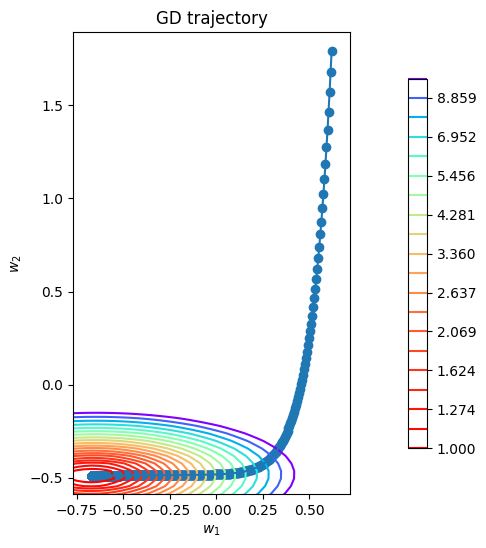

lr = 0.0001


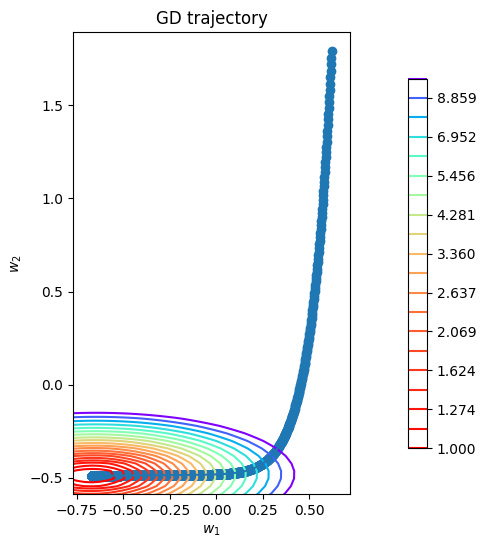

In [214]:
# -- YOUR CODE HERE --
lrates = np.logspace(-2, -4, 5)
for lr in lrates:
    w_list = gradient_descent(w_init, X, y, loss, lr)
    print(f'lr = {lr}')
    plot_gd(w_list, X, y, loss)

__Ответ__: при низких lr необходимо больше шагов, чем при высоких lr, однако сходимость к минимуму происходит плавнее. При высоких lr скорость сходимости выше, плавность меньше, шаги больше, есть вероятность "перепрыгнуть" через минимум и не достичь минимума. При низких lr скорость сходимости ниже, плавность больше, шаги меньше.


Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [215]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    w = w_init.copy()
    w_list = [w.copy()]
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        y_batch = y[batch_indices]
        w -= lr * loss.calc_grad(batch, y_batch, w)
        w_list.append(w.copy())
    return np.array(w_list)

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

lr = 0.01, batch_size = 1


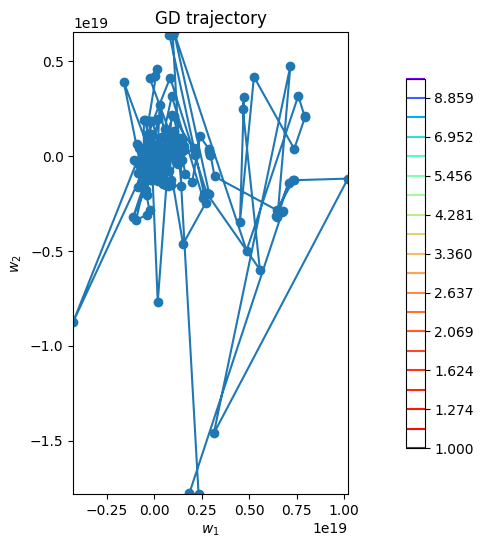

lr = 0.01, batch_size = 10


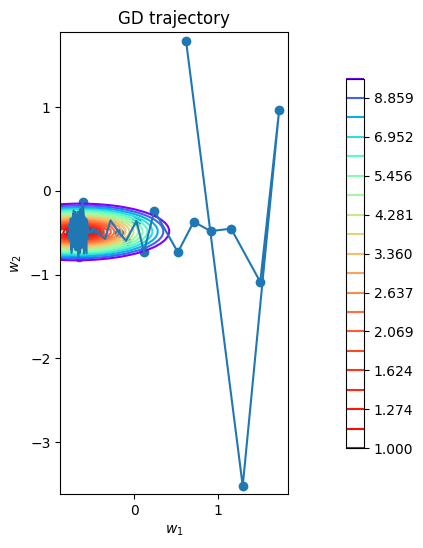

lr = 0.01, batch_size = 50


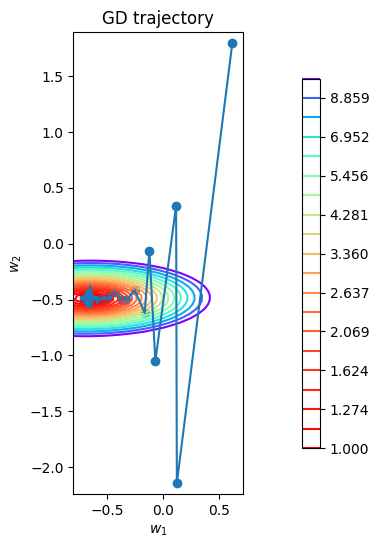

lr = 0.01, batch_size = 100


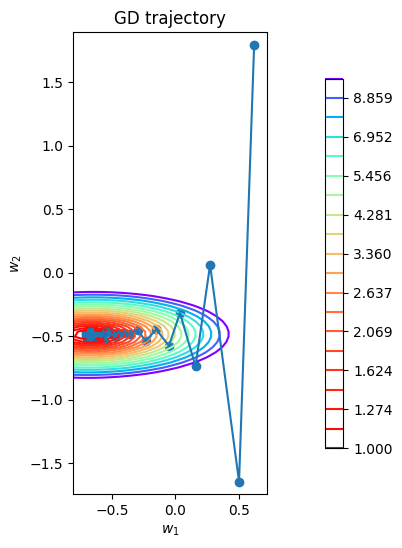

lr = 0.01, batch_size = 200


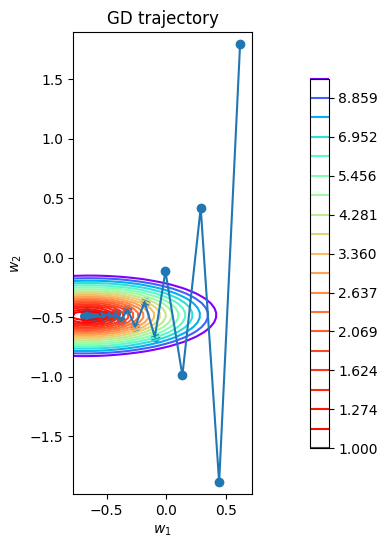

lr = 0.01, batch_size = 300


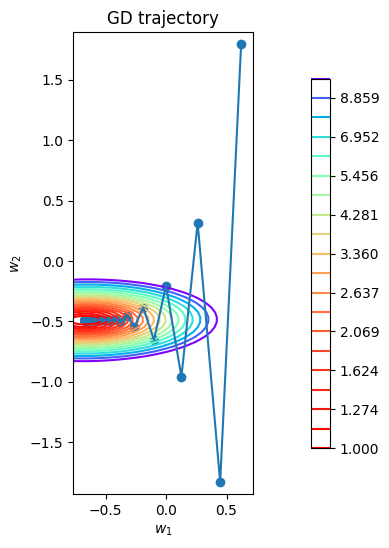

lr = 0.0031622776601683794, batch_size = 1


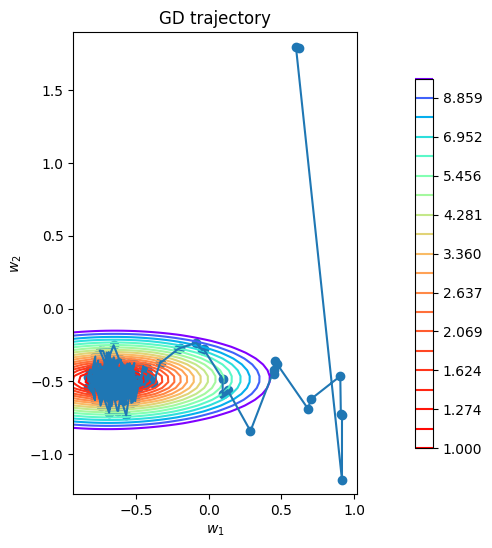

lr = 0.0031622776601683794, batch_size = 10


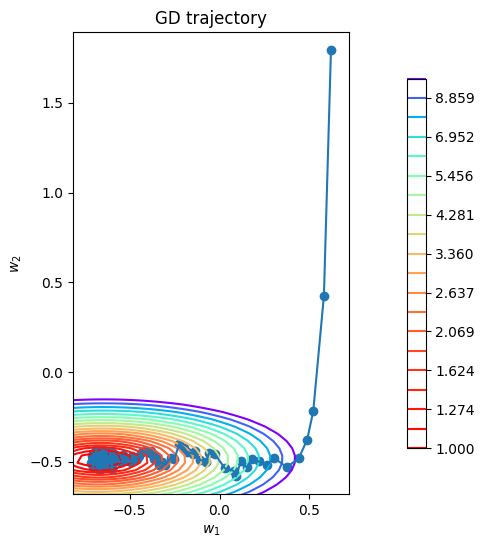

lr = 0.0031622776601683794, batch_size = 50


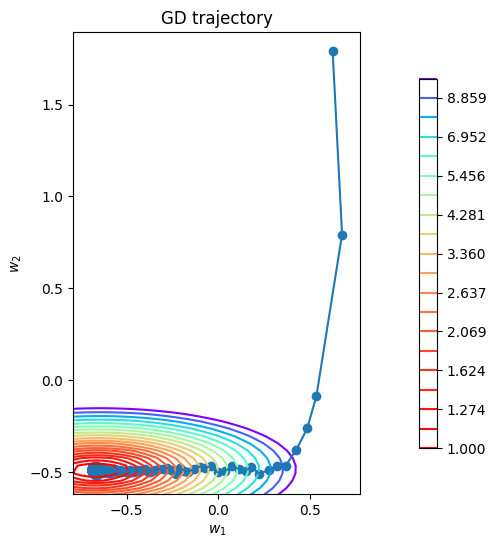

lr = 0.0031622776601683794, batch_size = 100


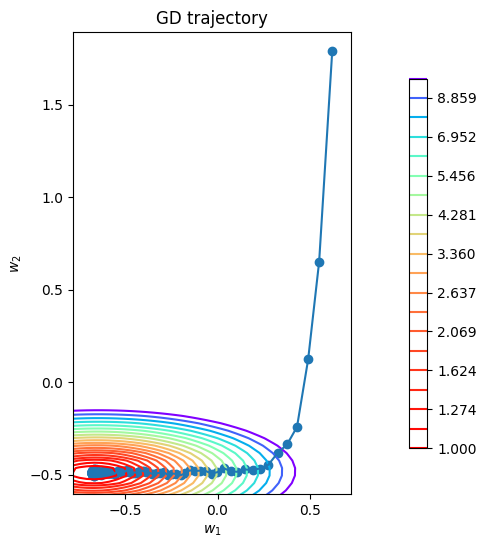

lr = 0.0031622776601683794, batch_size = 200


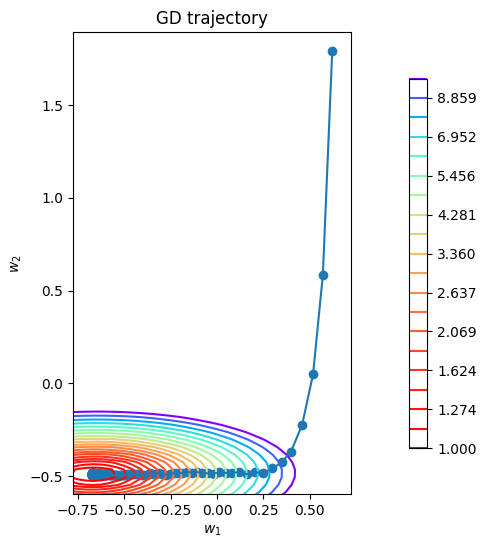

lr = 0.0031622776601683794, batch_size = 300


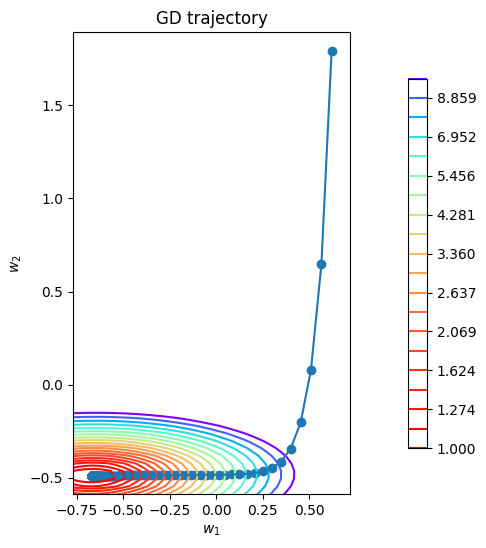

lr = 0.001, batch_size = 1


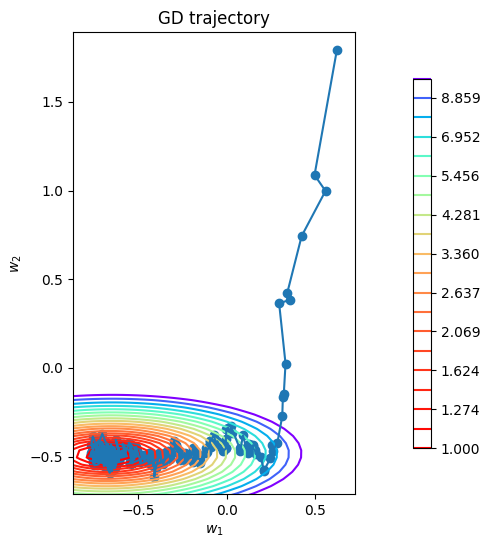

lr = 0.001, batch_size = 10


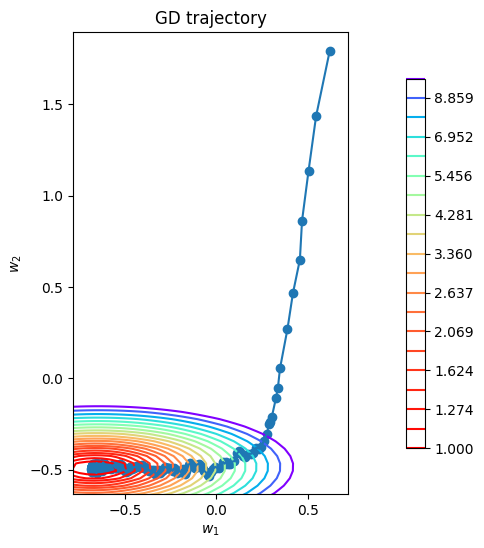

lr = 0.001, batch_size = 50


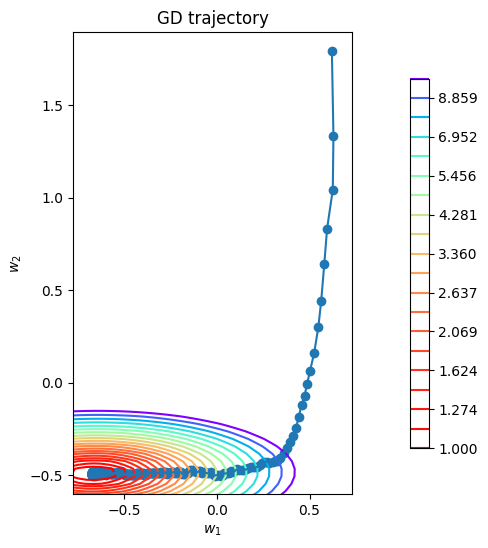

lr = 0.001, batch_size = 100


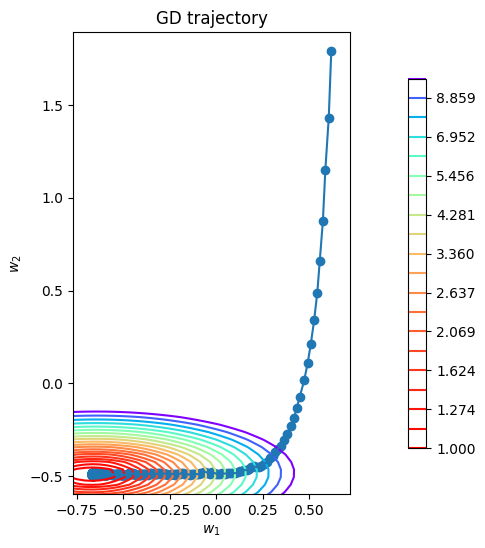

lr = 0.001, batch_size = 200


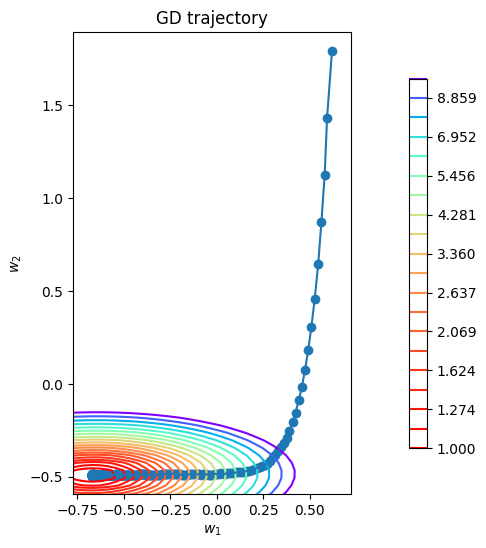

lr = 0.001, batch_size = 300


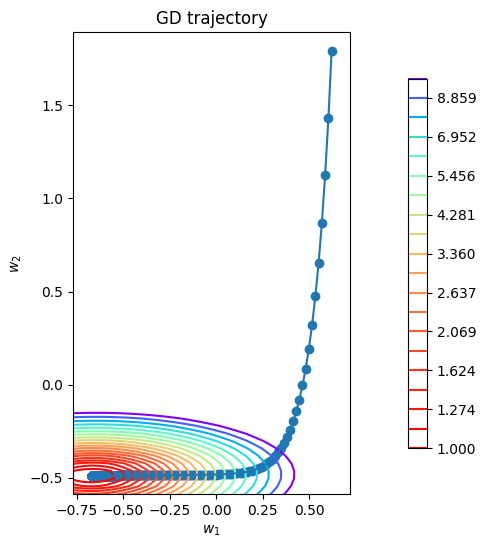

lr = 0.00031622776601683794, batch_size = 1


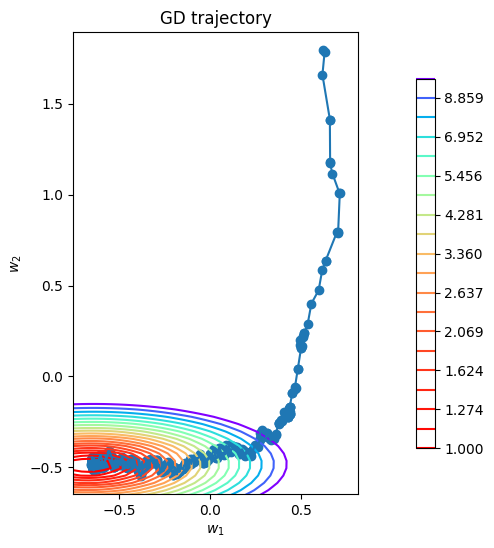

lr = 0.00031622776601683794, batch_size = 10


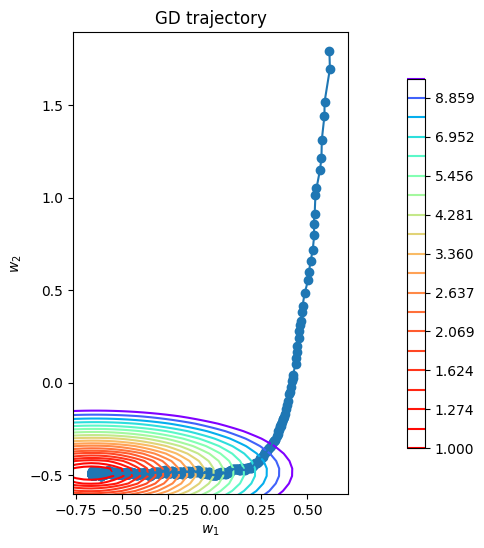

lr = 0.00031622776601683794, batch_size = 50


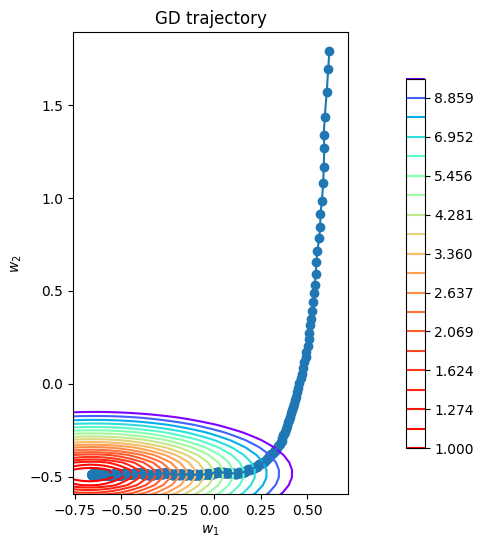

lr = 0.00031622776601683794, batch_size = 100


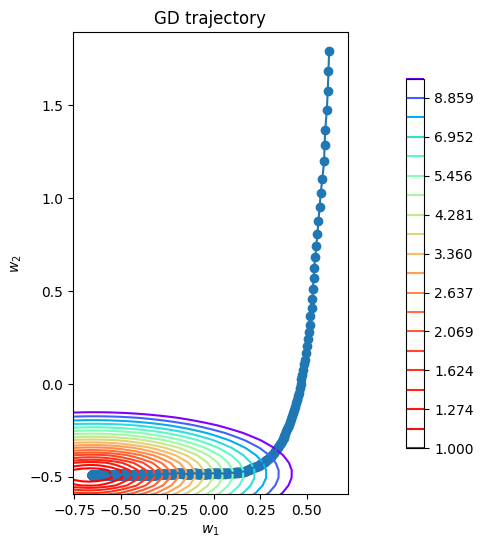

lr = 0.00031622776601683794, batch_size = 200


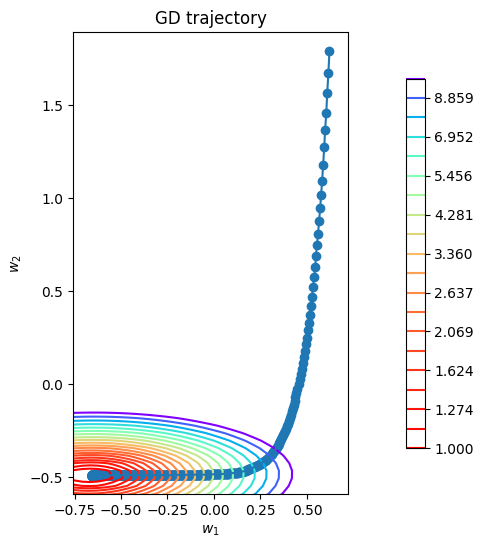

lr = 0.00031622776601683794, batch_size = 300


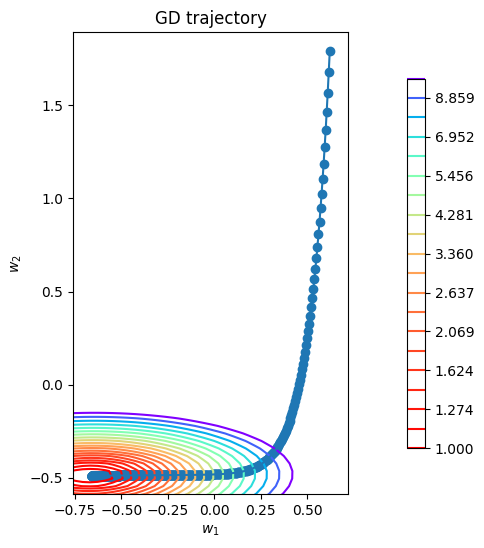

lr = 0.0001, batch_size = 1


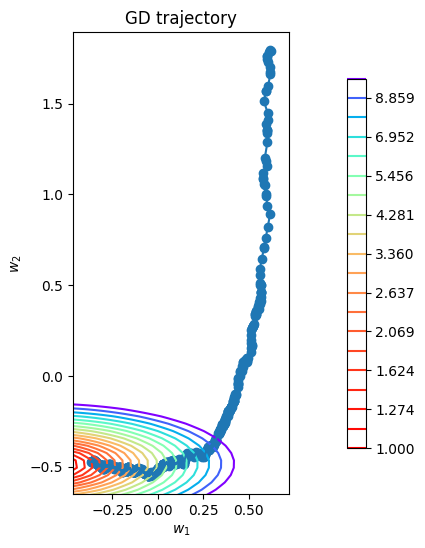

lr = 0.0001, batch_size = 10


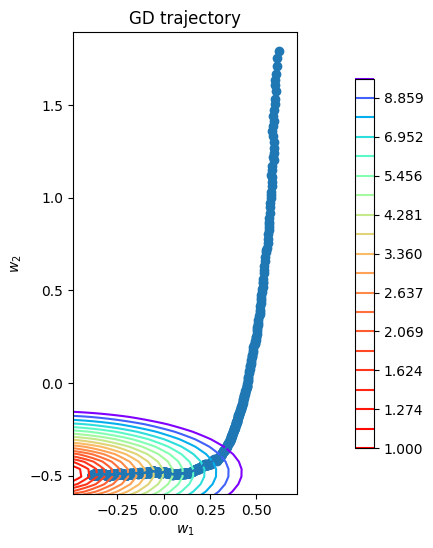

lr = 0.0001, batch_size = 50


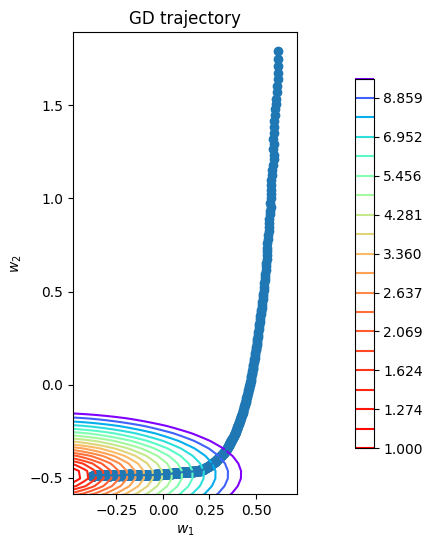

lr = 0.0001, batch_size = 100


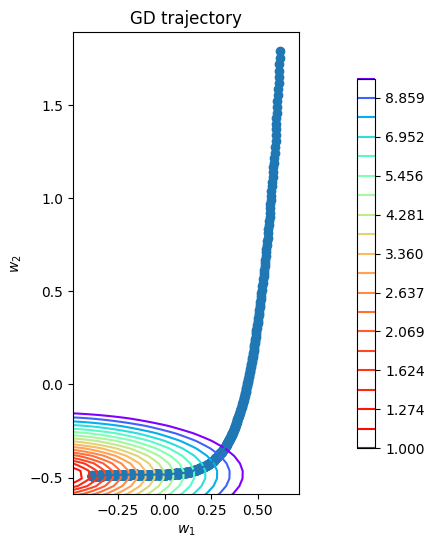

lr = 0.0001, batch_size = 200


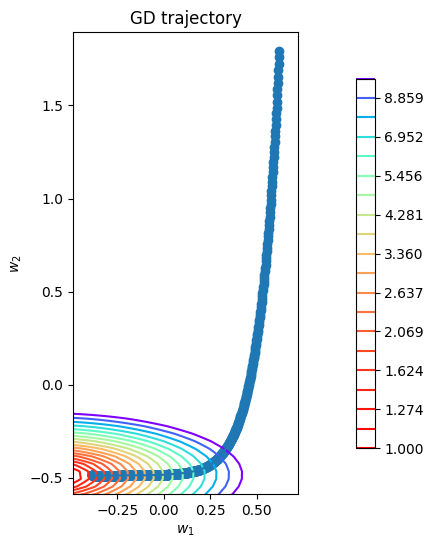

lr = 0.0001, batch_size = 300


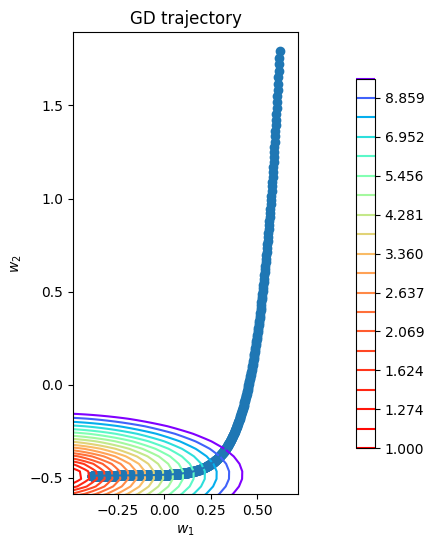

In [216]:
# -- YOUR CODE HERE --
lrates = np.logspace(-2, -4, 5)
batch_size_list = [1, 10, 50, 100, 200, 300]
for lr in lrates:
    for batch_size in batch_size_list:
      w_list = stochastic_gradient_descent(w_init=w_init, X=X, y=y, loss=loss, lr=lr, batch_size=batch_size)
      print(f'lr = {lr}, batch_size = {batch_size}')
      plot_gd(w_list, X, y, loss)

__Ответ__: зависимость спуска от lr описана в задании выше. Чем меньше batch_size тем больше непредсказуемости (хаотичности) наблюдается при спуске. Можно заметить, что для лучшей сходимости можно брать низкий шаг обучения lr и низкий batch_size. Чем больше lr, тем больший batch_size нужно брать. При lr = 0.01 лучшие batch_size >= 100. При lr = 0.003 - batch_size >= 50. При lr = 0.001 - batch_size >= 10. При lr = 0.0003 - batch_size >= 10. При lr = 0.0001 - batch_size > 1, однако в этом случае нужно увеличить число итераций, чтобы достичь минимума. В целом SGD работает быстрее GD, т.к. на каждом шаге обновления весов пропадает необходимость считать градиент по всем объектам (batch_size = 300), необходимо подсчитать градиент только для определенного batch_size количеству объектов.

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [217]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    w = w_init.copy()
    w_list = [w.copy()]
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        y_batch = y[batch_indices]
        n_t = lr * (1 / (1 + (i + 1))) ** p
        w -= n_t * loss.calc_grad(batch, y_batch, w)
        w_list.append(w.copy())
    return np.array(w_list)

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

p = 0.1


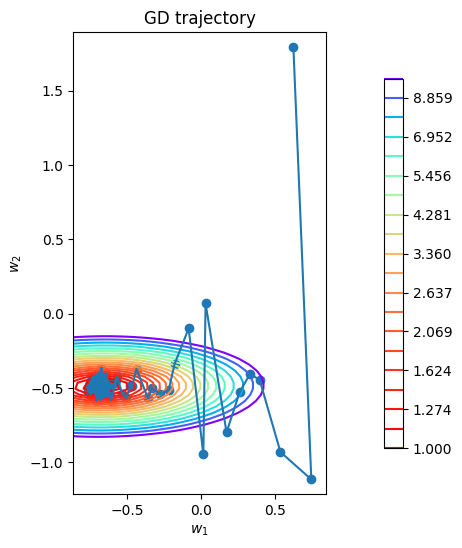

p = 0.1778279410038923


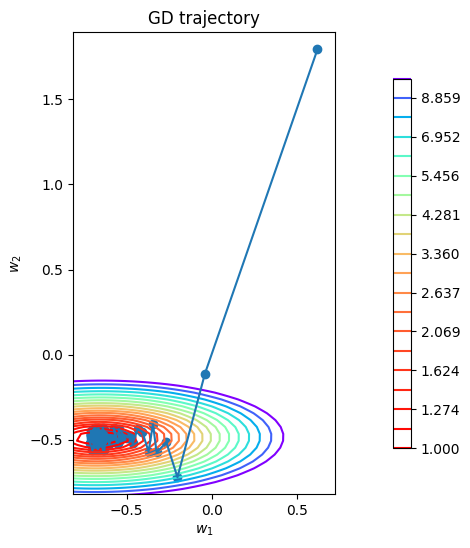

p = 0.31622776601683794


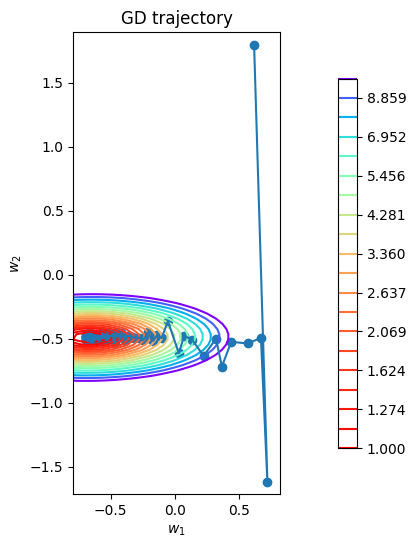

p = 0.5623413251903491


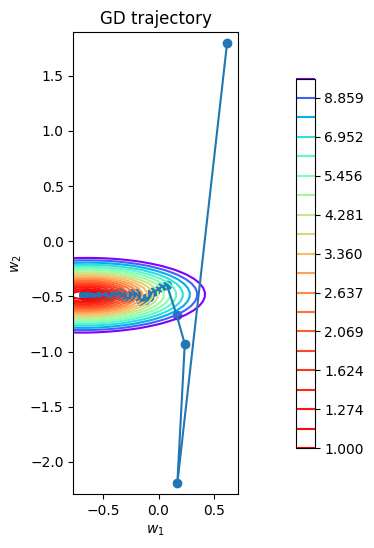

p = 1.0


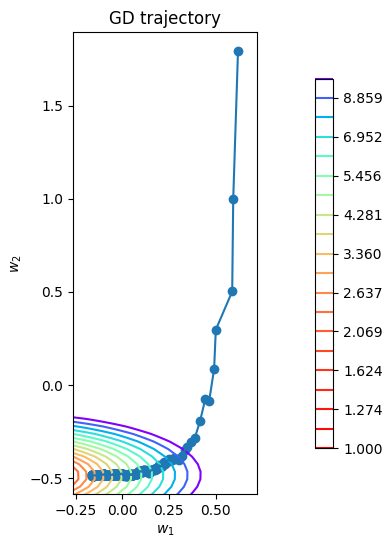

In [218]:
# -- YOUR CODE HERE --
p_list = np.logspace(-1, 0, 5)
for p in p_list:
    w_list = stochastic_gradient_descent(w_init=w_init, X=X, y=y, loss=loss, lr=0.01, batch_size=10, p=p)
    print(f'p = {p}')
    plot_gd(w_list, X, y, loss)

__Ответ__: чем выше p, тем скорость уменьшения длины шага n_t меньше. При низких показателях p сходимость хуже, чем при высоких, однако для выскоих показателей p неоходимо большее число шагов для достижения минимума. Оптимальным вариантом является p = 0.31 или p = 0.56.

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

In [14]:
# -- YOUR CODE HERE --
num_steps = 43
w_list_gd = gradient_descent(w_init=w_init, X=X, y=y, loss=loss, lr=0.01, n_iterations=num_steps)
w_list_sgd = stochastic_gradient_descent(w_init=w_init, X=X, y=y, loss=loss, lr=0.01, batch_size=10, p=0, n_iterations=num_steps)

loss_gd = []
loss_sgd = []

for i in range(num_steps):
    loss_gd.append(loss.calc_loss(X, y, w_list_gd[i]))
    loss_sgd.append(loss.calc_loss(X, y, w_list_sgd[i]))

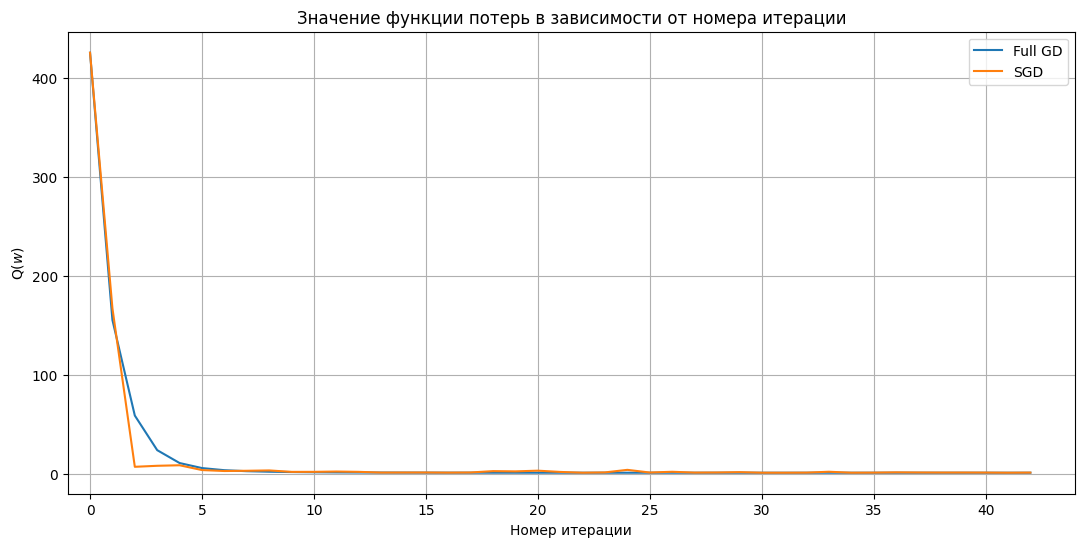

In [15]:
plt.figure(figsize=(13, 6))
plt.plot(range(num_steps), loss_gd, label="Full GD")
plt.plot(range(num_steps), loss_sgd, label="SGD")

plt.title("Значение функции потерь в зависимости от номера итерации")
plt.xlim((-1, num_steps + 1))
plt.legend()
plt.xlabel("Номер итерации")
plt.ylabel(r"Q($w$)")
plt.grid()
plt.show()

__Ответ__: на графике заметно, что SGD сходится к минимуму быстрее и более резко, чем FULL GD. Для SGD необходимо меньшее количество шагов для сходимости к минимуму, так как длина шага при начальных итерациях - большая, то есть скорость сходимости на старте выше, чем при обычном GD, где длина шага фиксированная. Кроме того, мы экономим время при подсчете градиентов, т.к. при SGD градиенты считаются только по batch_size - это объясняется математическим ожиданием градиента.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету,

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [219]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # -- YOUR CODE HERE --
        w_init = np.random.randn(X.shape[1])
        w_list = gradient_descent(w_init, X, y, self.loss, self.lr)
        self.w = w_list[-1]

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # -- YOUR CODE HERE --
        y_hat = np.dot(X, self.w)

        return y_hat

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [220]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [221]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [222]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [223]:
# Удалим неинформативный столбец index
X_raw = X_raw.drop(columns=X_raw.columns[0], axis=1)

Разделение датасета и заполнение пропусков

In [224]:
# -- YOUR CODE HERE --
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


# Разделим датасет на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, random_state=1337, test_size=0.3)

# Инициализируем replacer замены пропусков на среднее значение по признаку
mis_replacer = SimpleImputer(strategy="mean")

# Переведем названия признаков в тип str
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Создаем маску, указывающую на столбцы с категориальными признаками
cat_features_mask = (X_train.dtypes == "object").values

# Для вещественнозначных признаков заполним пропуски средними
X_train_real = X_train[X_train.columns[~cat_features_mask]]
X_train_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(X_train_real), columns=X_train_real.columns)

X_test_real = X_test[X_test.columns[~cat_features_mask]]
X_test_no_mis_real = pd.DataFrame(data=mis_replacer.transform(X_test_real), columns=X_test_real.columns)

# Для категориальных — пустыми строками
X_train_cat = X_train[X_train.columns[cat_features_mask]].fillna("")

X_test_cat = X_test[X_test.columns[cat_features_mask]].fillna("")

Нормализация числовых признаков

In [225]:
from sklearn.preprocessing import MinMaxScaler

# Иницииализируем нормализатор MinMax
normalizer = MinMaxScaler()

# Обучим и применим нормализатор для train части вещественных признаков
X_train_real_norm = normalizer.fit_transform(X_train_no_mis_real)
X_train_real = pd.DataFrame(data=X_train_real_norm, columns=X_train_no_mis_real.columns)

# Применим нормализатор для test части вещественных признаков
X_test_real_norm = normalizer.transform(X_test_no_mis_real)
X_test_real = pd.DataFrame(data=X_test_real_norm, columns=X_test_no_mis_real.columns)

Кодирование категориальных переменных. Источник: https://www.geeksforgeeks.org/ml-one-hot-encoding/

In [226]:
from sklearn.preprocessing import OneHotEncoder


# Инициализируем OneHotEncoder с параметром handle_unknown='ignore', т.к. в test части могут возникнуть переменные, которых не было на train
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# Обучаем encoder на train части
enc.fit(X_train_cat)

X_train_cat_enc = enc.transform(X_train_cat)
X_train_cat = pd.DataFrame(data=X_train_cat_enc, columns=enc.get_feature_names_out(X_train_cat.columns))

X_test_cat_enc = enc.transform(X_test_cat)
X_test_cat = pd.DataFrame(data=X_test_cat_enc, columns=enc.get_feature_names_out(X_test_cat.columns))

Объединение нормализованных числовых признаков и закодированных категориальных переменных

In [227]:
X_train = pd.concat([X_train_real, X_train_cat], axis=1)
X_test = pd.concat([X_test_real, X_test_cat], axis=1)

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [228]:
# -- YOUR CODE HERE --
model = LinearRegression(MSELoss())
model.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [229]:
from sklearn.metrics import mean_squared_error

# -- YOUR CODE HERE --
print(f'MSE on Train: {mean_squared_error(y_train, model.predict(X_train))}')
print(f'MSE on Test: {mean_squared_error(y_test, model.predict(X_test))}')

MSE on Train: 1664235.3667356905
MSE on Test: 9915915.064338807


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [230]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        y_pred = np.dot(X, w)
        loss = np.mean(((y_pred - y) ** 2))
        loss += self.coef * np.sum(w[:-1] ** 2)
        return loss

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        y_pred = np.dot(X, w)
        grad_loss = 2 * np.dot(X.T, (y_pred - y)) / X.shape[0]
        grad_loss[:-1] += 2 * self.coef * w[:-1]
        return grad_loss

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [231]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [232]:
list_coefs = np.logspace(-4, -1, 5)
coef_mse_dict = {}

# Подбор лучшего коэффициента регуляризации
for coef in list_coefs:
    lrL2 = LinearRegression(MSEL2Loss(coef))
    lrL2.fit(X_train, y_train)

    coef_mse_dict[coef] = mean_squared_error(y_test, lrL2.predict(X_test))

min_coef, min_mse = min(coef_mse_dict.items(), key=lambda item: item[1])
print(f'best coef = {min_coef} mse = {min_mse}')

best coef = 0.0031622776601683794 mse = 5154825.405717056


In [233]:
# -- YOUR CODE HERE --
lrL2 = LinearRegression(MSEL2Loss(0.0032))
lrL2.fit(X_train, y_train)

In [234]:
print(f'MSE on Train: {mean_squared_error(y_train, lrL2.predict(X_train))}')
print(f'MSE on Test: {mean_squared_error(y_test, lrL2.predict(X_test))}')

MSE on Train: 2276305.9889111137
MSE on Test: 5146365.363981916


In [235]:
lr = LinearRegression(MSELoss())
lr.fit(X_train, y_train)

In [236]:
print(f'MSE on Train: {mean_squared_error(y_train, lr.predict(X_train))}')
print(f'MSE on Test: {mean_squared_error(y_test, lr.predict(X_test))}')

MSE on Train: 1664235.3630700717
MSE on Test: 9916047.646891648


__Ответ__: при обучении без L2 регуляризации весов модель переобучилась и выдала низкие показатели MSE для train выборки: 1664235, но высокие показатели для test выборки: 9915760. Решая проблему переобучения и подбора коэффициента регуляризации удалось уменьшить MSE для test выборки: 5146365, и увеличить для train части: 2276305. Значения train и test части стали ближе друг к другу по показателю MSE.

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [237]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        y_pred = np.dot(X, w)
        z = y_pred - y
        mask = (z > -self.eps) & (z < self.eps)
        phi = np.zeros_like(y)
        phi[mask] = 0.5 * z[mask] ** 2
        phi[~mask] = self.eps * (np.abs(z[~mask]) - 0.5 * self.eps)
        return np.mean(phi)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        y_pred = np.dot(X, w)
        z = y_pred - y
        mask = (z > -self.eps) & (z < self.eps)
        grad_phi = np.zeros_like(y)
        grad_phi[mask] = z[mask]
        grad_phi[~mask] = self.eps * np.sign(z[~mask])
        return np.dot(X.T, grad_phi) / X.shape[0]

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [238]:
list_eps = [40, 45, 50, 55, 60, 65, 70]
eps_mse_dict = {}

# Подбор лучшего eps
for eps in list_eps:
    lrHL = LinearRegression(HuberLoss(eps))
    lrHL.fit(X_train, y_train)

    eps_mse_dict[eps] = mean_squared_error(y_test, lrHL.predict(X_test))

min_eps, min_mse = min(eps_mse_dict.items(), key=lambda item: item[1])
print(f'best eps = {min_eps} mse = {min_mse}')

best eps = 60 mse = 5895668.104992779


In [239]:
# -- YOUR CODE HERE --
lrHL = LinearRegression(HuberLoss(60))
lrHL.fit(X_train, y_train)

In [240]:
print(f'MSE on Train: {mean_squared_error(y_train, lrHL.predict(X_train))}')
print(f'MSE on Test: {mean_squared_error(y_test, lrHL.predict(X_test))}')

MSE on Train: 3291217.564613044
MSE on Test: 5895288.605524435


In [241]:
lr = LinearRegression(MSELoss())
lr.fit(X_train, y_train)

In [242]:
print(f'MSE on Train: {mean_squared_error(y_train, lr.predict(X_train))}')
print(f'MSE on Test: {mean_squared_error(y_test, lr.predict(X_test))}')

MSE on Train: 1664235.3621091389
MSE on Test: 9915725.10471233


__Ответ__: При eps = 60 с HuberLoss MSE на test части значительно уменьшился по сравнению с моделью, обученной на MSELoss. При MSELoss модель получилась переобученной, поэтому показатели на train части в ней ниже, чем в HuberLoss. HuberLoss справился с выбросами, но показал себя хуже, чем обычный L2 регуляризатор.

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

--2024-04-13 13:32:31--  https://storage.yandexcloud.net/stage01-metronews-transfer/media/20220618/14/27/858x540_a7941cd1_fx0so3rw.jpg
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 478236 (467K) [image/png]
Saving to: ‘/content/image.png’

/content/image.png  100%[===================>] 467.03K   702KB/s    in 0.7s    

2024-04-13 13:32:33 (702 KB/s) - ‘/content/image.png’ saved [478236/478236]



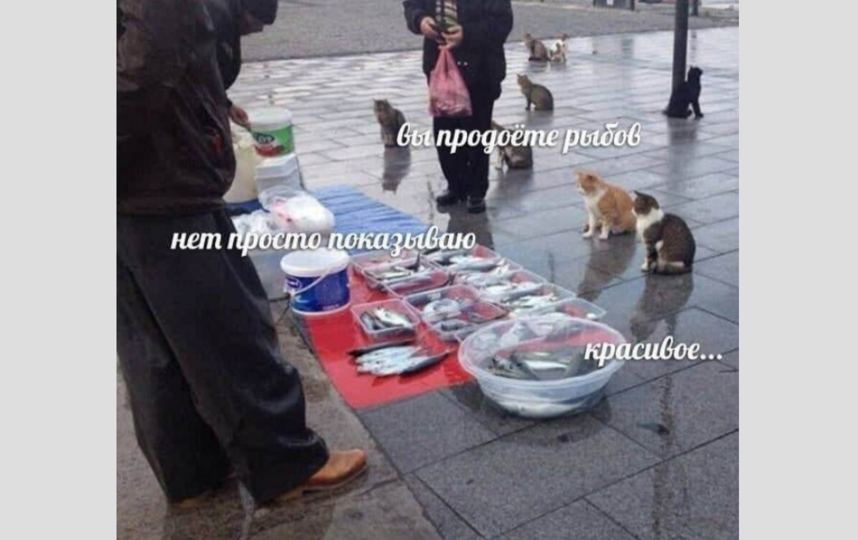

In [243]:
# -- YOUR MEME HERE --
!wget https://storage.yandexcloud.net/stage01-metronews-transfer/media/20220618/14/27/858x540_a7941cd1_fx0so3rw.jpg -O /content/image.png

from PIL import Image

img = Image.open('/content/image.png')
display(img)

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

Источник: https://thecode.media/simulated-annealing/

In [286]:
# -- YOUR CODE HERE --
def simulated_annealing(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    temp_init: float = 100,
    temp_final: float = 0.0001,
    alpha: float = 0.999,
    n_iterations: int = 100000,
    std_t: int = 100,
) -> List[np.ndarray]:
    """
    Функция имитации отжига
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать loss при помощи loss.calc_loss(X, y, w)
    :param temp_init: float -- начальное значение температуры
    :param temp_final: float -- конечное значение температуры
    :param alpha: float -- параметр величины шага, с которой будет остывать процесс
    :param n_iterations: int -- сколько итераций делать
    :param std_t: int -- параметр количества степеней свободы в распределении Стьюдента
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    temp_current = temp_init
    w_current = w_init.copy()
    w_list = [w_current.copy()]
    loss_current = loss.calc_loss(X, y, w_current)

    # while temp_current > temp_final:
    #     w_new = w_current + np.random.standard_t(3, size=w_current.shape)
    #     loss_new = loss.calc_loss(X, y, w_new)
    #     loss_diff = loss_current - loss_new

    #     if loss_diff > 0 or (np.random.rand() < np.exp(loss_diff / temp_current)):
    #         w_current = w_new.copy()
    #         loss_current = loss_new

    #     w_list.append(w_current.copy())
    #     temp_current *= alpha

    for i in range(n_iterations):
        w_new = w_current + np.random.standard_t(std_t, size=w_current.shape)
        loss_new = loss.calc_loss(X, y, w_new)
        loss_diff = loss_current - loss_new

        if loss_diff > 0 or (np.random.rand() < np.exp(loss_diff / temp_current)):
            w_current = w_new.copy()
            loss_current = loss_new

        w_list.append(w_current.copy())
        temp_current *= alpha

    return np.array(w_list)

In [276]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [277]:
loss = MSELoss()
w_list = simulated_annealing(w_init, X, y, loss)
print(w_list[-1])
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

[-0.66719707 -0.48637889]
425.58917680450253
0.8680273942828365


temp_init = 1 std_t = 1 loss = 0.8672140664686848


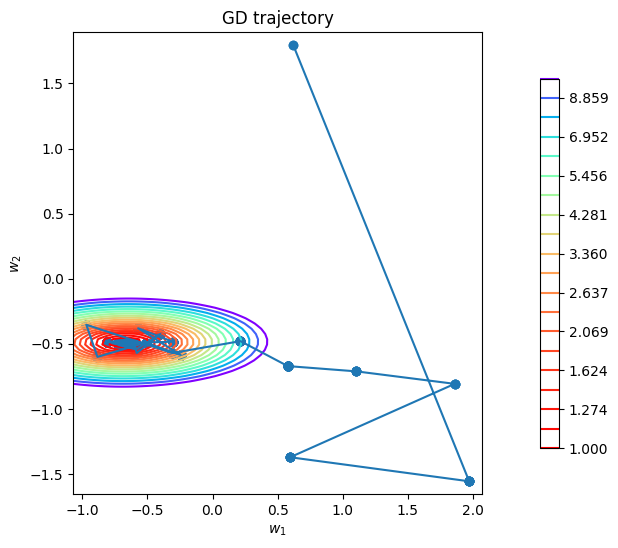

temp_init = 1 std_t = 2 loss = 0.8677283261872992


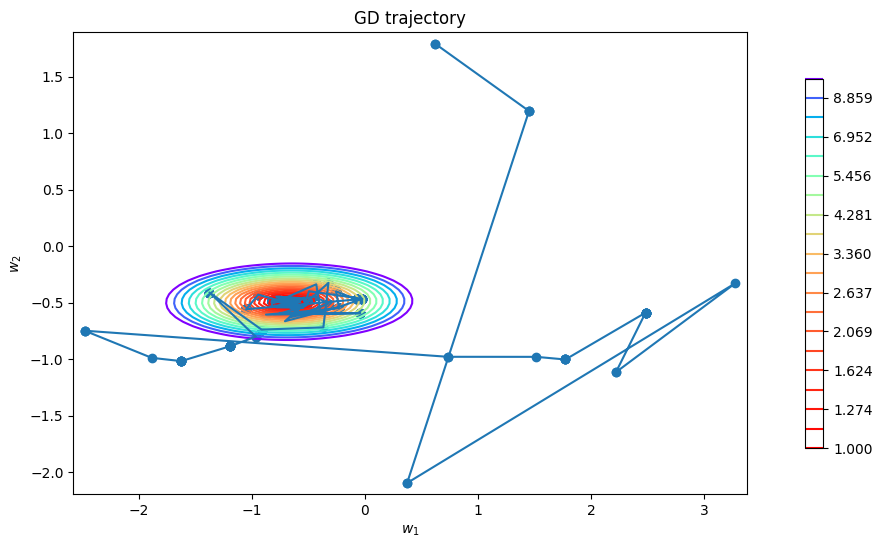

temp_init = 1 std_t = 3 loss = 0.867777065423121


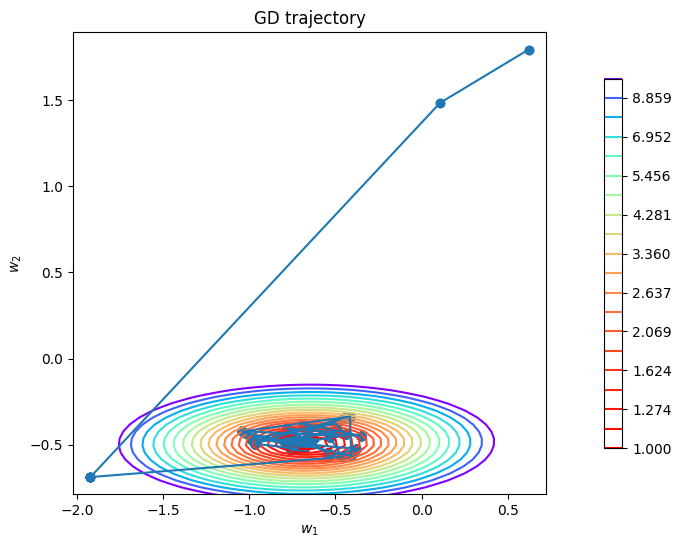

temp_init = 1 std_t = 5 loss = 0.8679969770859518


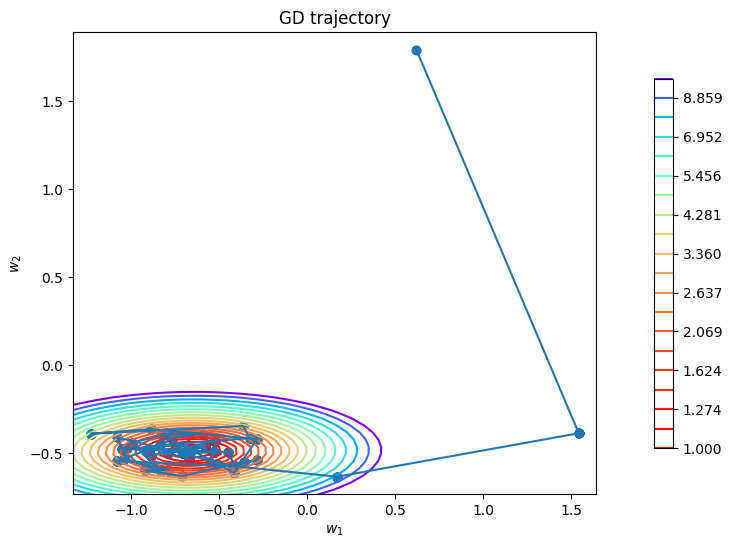

temp_init = 1 std_t = 10 loss = 0.8675547109812336


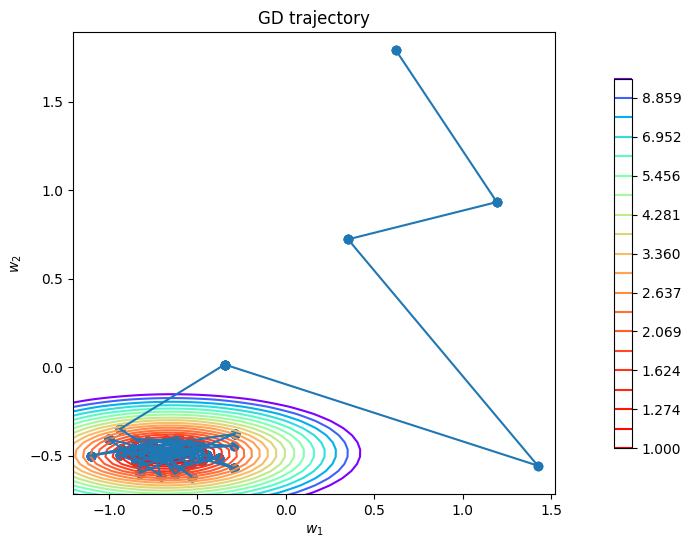

temp_init = 1 std_t = 50 loss = 0.867151020757198


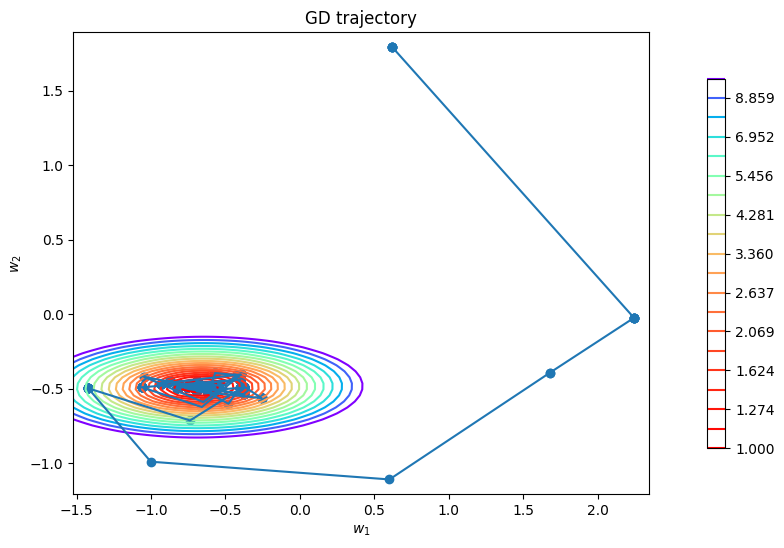

temp_init = 1 std_t = 100 loss = 0.8671280830662653


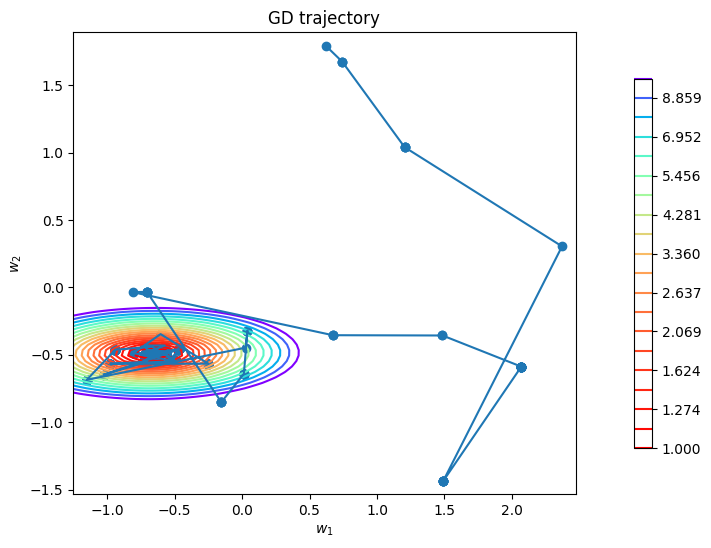

temp_init = 1 std_t = 300 loss = 0.8675206120807248


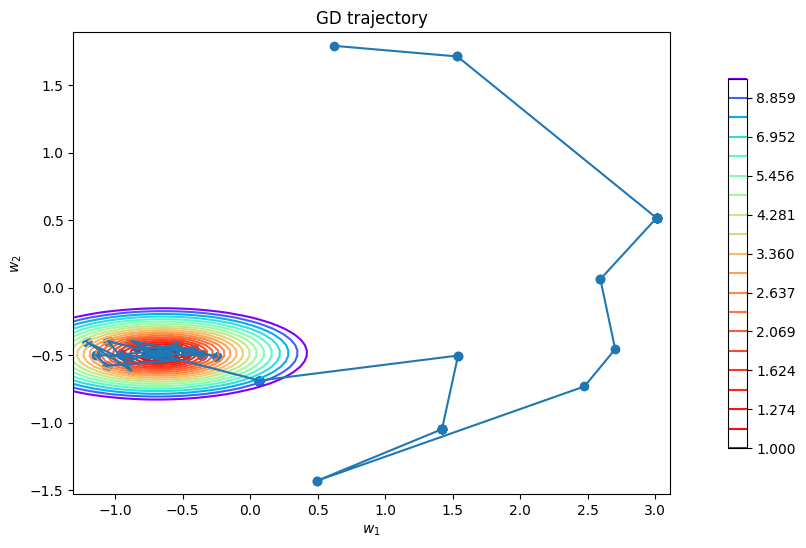

temp_init = 1 std_t = 500 loss = 0.867075513500576


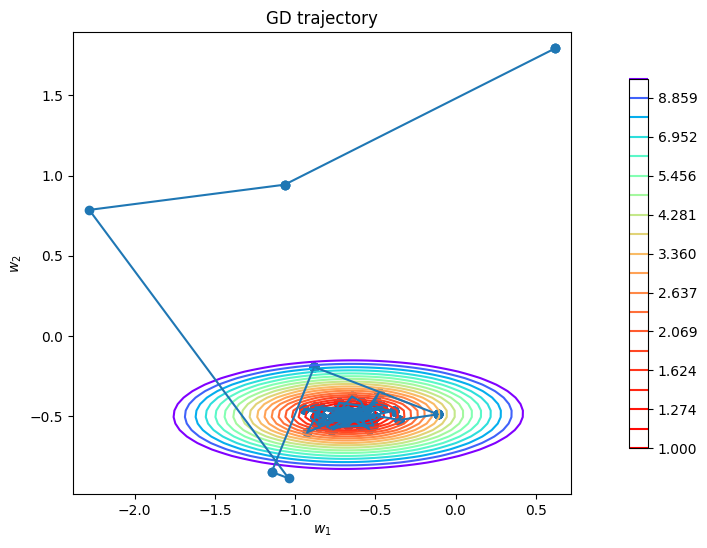

temp_init = 10 std_t = 1 loss = 0.8678610956678499


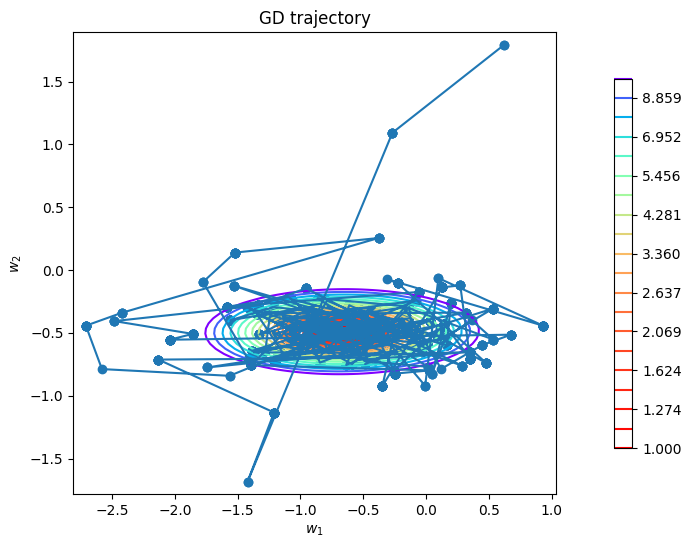

temp_init = 10 std_t = 2 loss = 0.8671629882401864


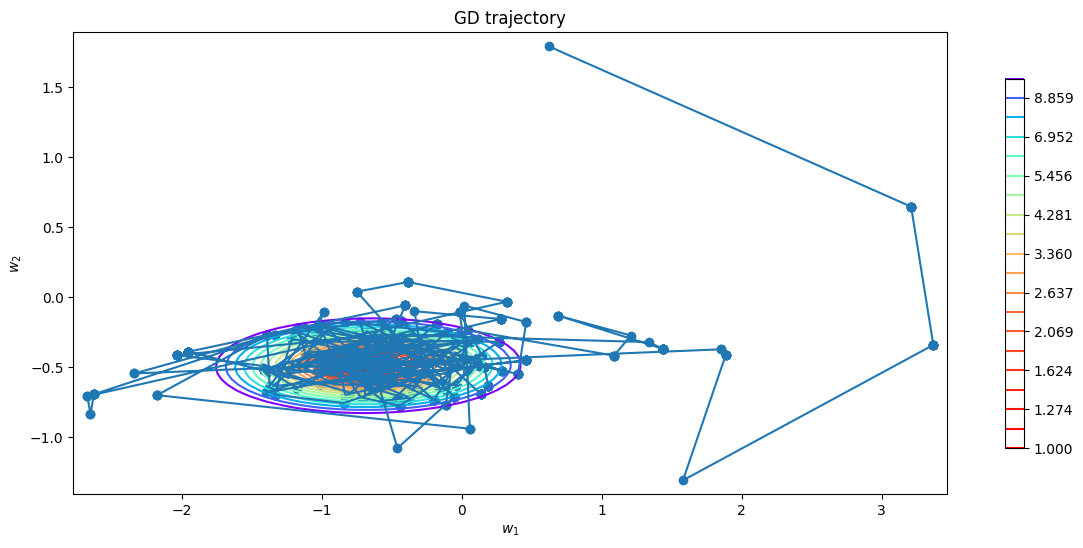

temp_init = 10 std_t = 3 loss = 0.8673928175456973


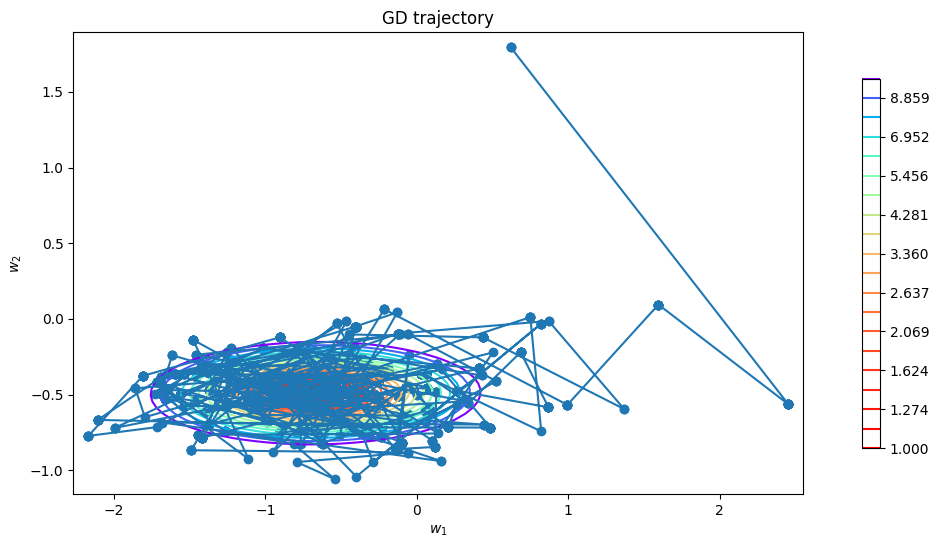

temp_init = 10 std_t = 5 loss = 0.8674850318538552


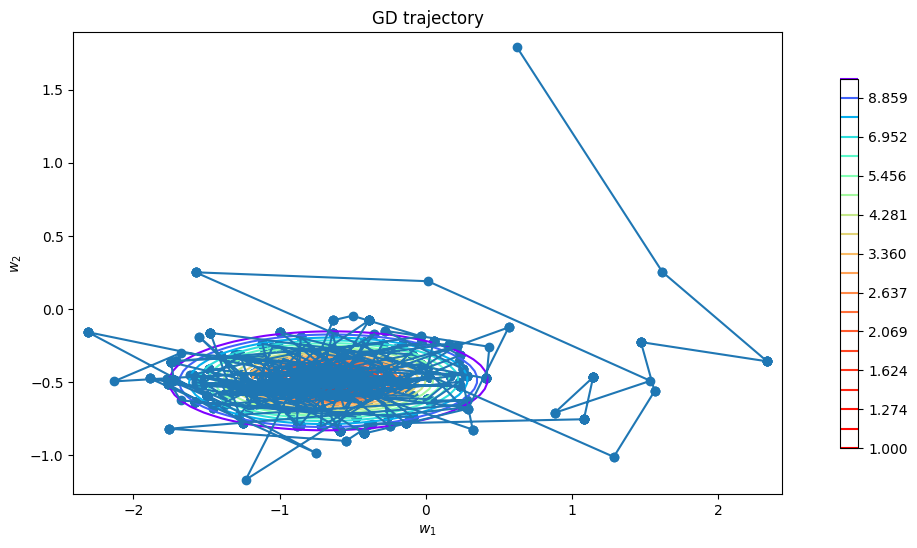

temp_init = 10 std_t = 10 loss = 0.8684807305861085


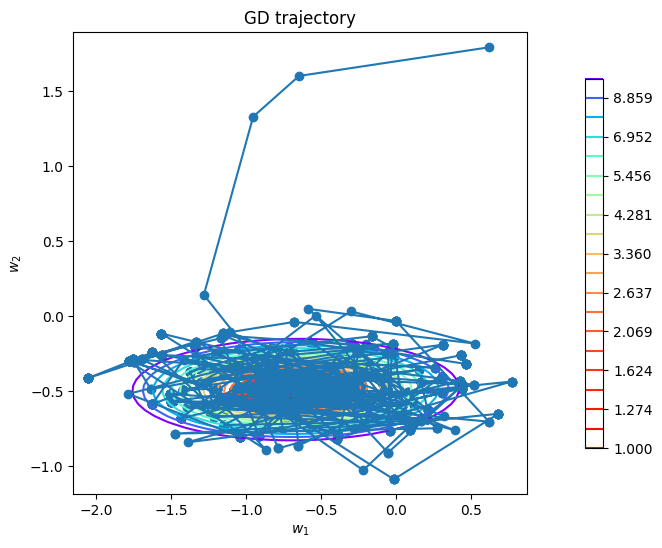

temp_init = 10 std_t = 50 loss = 0.8671906617982786


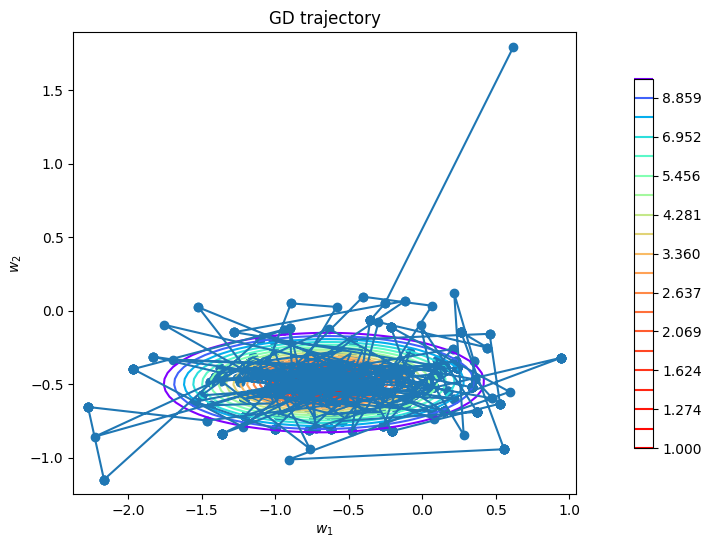

temp_init = 10 std_t = 100 loss = 0.8672624235995179


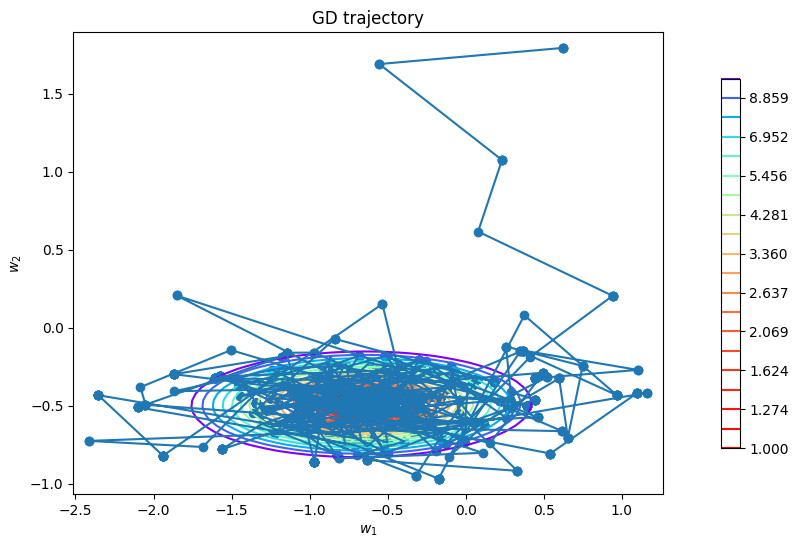

temp_init = 10 std_t = 300 loss = 0.8672708150837091


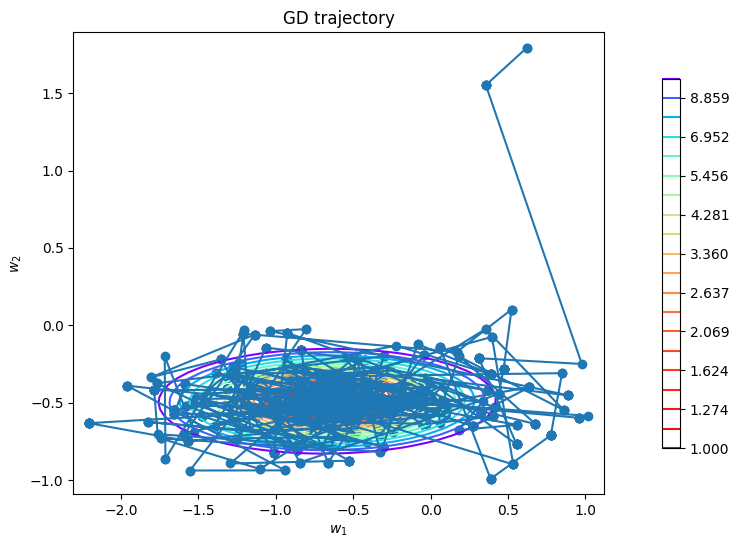

temp_init = 10 std_t = 500 loss = 0.867633336417158


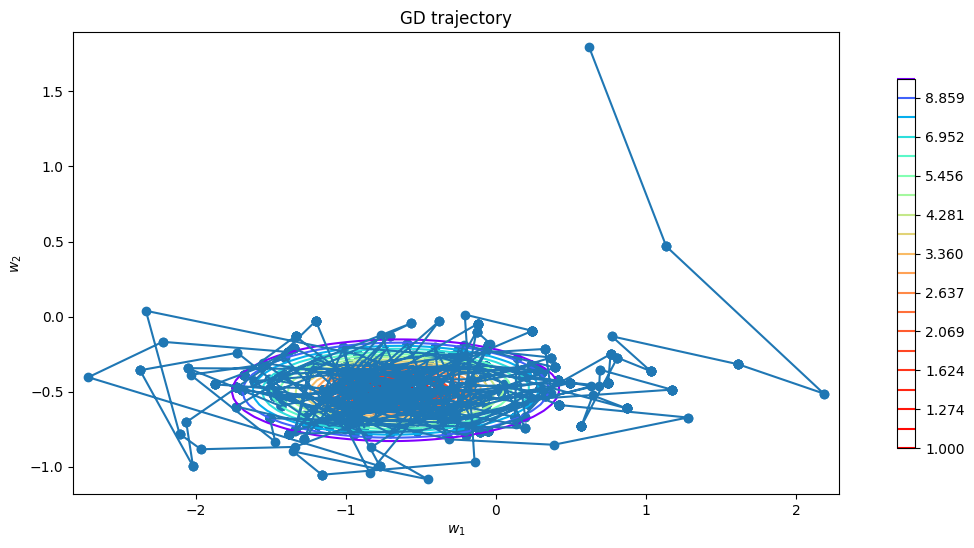

In [279]:
temp_init_list = [1, 10]
std_t_list = [1, 2, 3, 5, 10, 50, 100, 300, 500]
for temp_init in temp_init_list:
    for std_t in std_t_list:
        w_list = simulated_annealing(w_init, X, y, loss, temp_init=temp_init, std_t=std_t)
        print(f'temp_init = {temp_init} std_t = {std_t} loss = {loss.calc_loss(X, y, w_list[-1])}')
        plot_gd(w_list, X, y, loss)

__Ответ__: плавность сходимости у данного алгоритма значительно хуже, чем у градиентного спуска. Видны резкие скачки из одного положения в другое, минимум часто перепрыгивается.

In [287]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, alpha: float = 0.999) -> None:
        self.loss = loss
        self.alpha = alpha

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # -- YOUR CODE HERE --
        w_init = np.random.randn(X.shape[1])
        w_list = simulated_annealing(w_init, X, y, self.loss, alpha=self.alpha)
        self.w = w_list[-1]

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # -- YOUR CODE HERE --
        y_hat = np.dot(X, self.w)

        return y_hat

In [288]:
lrSA = LinearRegression(MSELoss())
lrSA.fit(X_train, y_train)
print(f'MSE on Train: {mean_squared_error(y_train, lrSA.predict(X_train))}')
print(f'MSE on Test: {mean_squared_error(y_test, lrSA.predict(X_test))}')

MSE on Train: 1860861.6472779359
MSE on Test: 6453234.566404288


__Ответ__: по значениям MSE мы превзошли вариант с градиентным спуском без регуляризации: MSE on Train: 1664235, MSE on Test: 9916017. На тесте показатели алгоритма отжига намного лучше, чем с градиентным спуском. Однако, если в алгоритме отжига использовать цикл while со сравнением текущей и минимальной температуры, то показатели MSE будут огромными, поэтому используем цикл for с фиксированным количеством итерацией (шагов спуска), что не оптимально по времени спуска. Траектория сходимости у отжига более хаотичная, чем у градиентного спуска. Кроме того, у алгоритма отжига большее количество гиперпараметров, чем у градиентного спуска - нужно фиксировать начальную температуру, конечную температуру (в случае использования цикла while), длину шага alpha - скорость изменения температуры, n_iterations - количество итераций спуска, параметр распределения Стьюдента (настройка которого сильно влияет на MSE).